# 1 Plotting and Data Visualisation

In this notebook we want to get familiar with plotting and the Python library ```matplotlib```. Plotting is an essential tool for data exploration that can help you to get an intuition about certain characteristics and features of data.


[Matplotlib](https://matplotlib.org/) is probably the most widely used Python library and will be the one we are using in this course. However, there are also other alternatives that might be interesting for you, for instance [Seaborn](https://seaborn.pydata.org/) or [Plotly](https://plotly.com/) (for this course, we expect you to stick to matplotlib).

Let's install and import matplotlib:

In [1]:
!pip install matplotlib

     |████████████████████████████████| 10.3 MB 1.9 MB/s eta 0:00:01
     |████████████████████████████████| 15.4 MB 9.1 MB/s eta 0:00:01
     |████████████████████████████████| 1.2 MB 8.1 MB/s eta 0:00:01
  Using cached Pillow-8.2.0-cp39-cp39-manylinux1_x86_64.whl (3.0 MB)
You should consider upgrading via the '/home/matz/uni/dais/env/bin/python -m pip install --upgrade pip' command.


In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np #numpy will always have our back

## 1.1 Obtaining a dataset

For illustration purposes, we will use datasets that are canon in machine learning and data science. Those datasets are already preprocessed and easily obtainable through the [scikit-learn](https://scikit-learn.org/stable/) library.

Now, let's install (mind the version number 0.24.1!) and import scikit-learn and load the dataset.

In [3]:
!pip install scikit-learn==0.24.1

     |████████████████████████████████| 23.8 MB 8.7 MB/s eta 0:00:01
     |████████████████████████████████| 27.3 MB 9.0 MB/s eta 0:00:01
     |████████████████████████████████| 303 kB 8.1 MB/s eta 0:00:01
You should consider upgrading via the '/home/matz/uni/dais/env/bin/python -m pip install --upgrade pip' command.


In [3]:
from sklearn import datasets
boston = datasets.load_boston()

Now we have the Boston House Prices dataset. Let's try to explore it with ```matplotlib```.

In [22]:
print(boston["data"].shape)

(506, 13)


As you can see, we have 506 samples with 13 features. (Actually, there is a 14th feature, the target, which denotes the price of a house.) Now, have a look at what features we are dealing with:

In [76]:
print(boston["feature_names"])

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
(506,)


The given abbreviations may seem rightfully cryptic to you, more information can be found in the dataset description:

In [7]:
print(boston["DESCR"])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

## 1.2 Visualise features

Now, we want to get a feeling for a feature, how it is distributed and what we can learn from it. Hence, we will pick out one of the features and plot them in difference ways. 

As an example feature, we will take "RM", the average number of rooms.
For the all subtasks of 1.2, the term "data" refers to the feature "RM" of the Boston Housing dataset.

### Task 1.2.1: Get the feature
Isolate the feature "RM" from the data and save the vector into the provided variable _rm_.

In [32]:
rm_index = np.where(boston['feature_names'] == 'RM')[0][0]
rm = boston['data'][:,rm_index]

### Task 1.2.2: Describe the data
Use the skills you learnt in the lecture and the last assignment (and numpy), to extract meaningful properties from the data:
- attribute type (scale) of the data
- mean
- median
- maximum value
- minimum value
- variance

In [30]:
# attribute type: your answer here
rm_mean = np.mean(rm)
print('rm_mean:', rm_mean)
rm_median = np.median(rm)
print('rm_median:', rm_median)
rm_max =  np.max(rm)
print('rm_max:', rm_max)
rm_min =  np.min(rm)
print('rm_min:', rm_min)
rm_var = np.var(rm)
print('rm_var', rm_var)

rm_mean: 6.284634387351779
rm_median: 6.2085
rm_max: 8.78
rm_min: 3.561
rm_var 0.49269521612976297


### Task 1.2.3: Show the distribution
Now, we are interested in the distribution of the number of rooms over the data, i.e. we want to visualise how many houses have how many rooms. 

Have a look at the sample plots in on the [matplotlib website](https://matplotlib.org/stable/gallery/statistics/histogram_features.html) and choose an appropriate type of plot to display that information.

IMPORTANT: Do not forget to label your axes correctly!

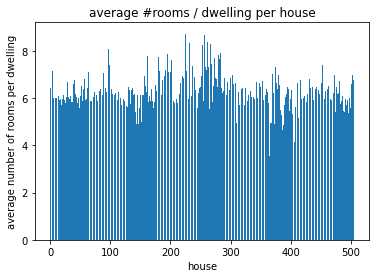

In [41]:
x_data = np.arange(len(rm))
y_data = rm
plot = plt.bar(x_data, y_data)


plt.title("average #rooms / dwelling per house")
plt.xlabel("house")
plt.ylabel("average number of rooms per dwelling")
plt.show()

### Bonus Task 1.2.4: What type of function could describe the data approximately?

### Task 1.2.5: Show the boxplot and describe it
Now that you know how to plot with matplotlib, you are tasked to create a box and whiskers plot of the data. Have a look at the [official matplotlib documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.boxplot.html) if you need some guidance. Additionally, give a quick description of the plot and what you learn from it about the data.

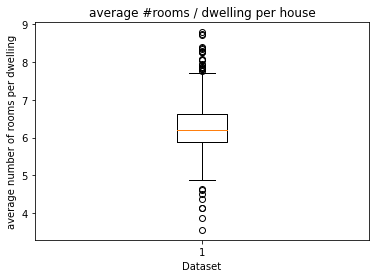

In [47]:
x_data = np.arange(len(rm))
y_data = rm
boxplot = plt.boxplot(y_data)
plt.title("average #rooms / dwelling per house")
plt.xlabel("Dataset")
plt.ylabel("average number of rooms per dwelling")
plt.show()

"""
Description:

The plot shows the distribution, first and forth quartile, minimum, maximum and median of the data.
We can learn that the average number of rooms per dwelling lies between 6 and 7 for 50% of the houses.
The rest is mostly distributed between 5 and 8 with several outliers below and above these values.
"""

## 1.3 Visualise 2D data
After we have looked at the characteristics of a single feature, let's see how matplotlib can help to visualise two-dimensional data and single samples. Prominent 2D data are greyscale photos or images, where the two dimensions are the x and y positions of the pixel values.

### 1.3.1 Obtain an image dataset
Fortunately, Scikit-learn also provides a dataset with pixel images as samples.

In [48]:
digits = datasets.load_digits()
print(digits.keys())

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])


Let's go the usual route and have a look at the shape of the data.

In [49]:
print(digits["data"].shape)

(1797, 64)


So, we have 1797 samples with 64 features each. That means, if we isolate a feature vector for a single sample, it has 64 features. But aren't we dealing with images that are usually 2-dimensional?

Perhaps the feature names can give more insight:

In [50]:
print(digits["feature_names"])

['pixel_0_0', 'pixel_0_1', 'pixel_0_2', 'pixel_0_3', 'pixel_0_4', 'pixel_0_5', 'pixel_0_6', 'pixel_0_7', 'pixel_1_0', 'pixel_1_1', 'pixel_1_2', 'pixel_1_3', 'pixel_1_4', 'pixel_1_5', 'pixel_1_6', 'pixel_1_7', 'pixel_2_0', 'pixel_2_1', 'pixel_2_2', 'pixel_2_3', 'pixel_2_4', 'pixel_2_5', 'pixel_2_6', 'pixel_2_7', 'pixel_3_0', 'pixel_3_1', 'pixel_3_2', 'pixel_3_3', 'pixel_3_4', 'pixel_3_5', 'pixel_3_6', 'pixel_3_7', 'pixel_4_0', 'pixel_4_1', 'pixel_4_2', 'pixel_4_3', 'pixel_4_4', 'pixel_4_5', 'pixel_4_6', 'pixel_4_7', 'pixel_5_0', 'pixel_5_1', 'pixel_5_2', 'pixel_5_3', 'pixel_5_4', 'pixel_5_5', 'pixel_5_6', 'pixel_5_7', 'pixel_6_0', 'pixel_6_1', 'pixel_6_2', 'pixel_6_3', 'pixel_6_4', 'pixel_6_5', 'pixel_6_6', 'pixel_6_7', 'pixel_7_0', 'pixel_7_1', 'pixel_7_2', 'pixel_7_3', 'pixel_7_4', 'pixel_7_5', 'pixel_7_6', 'pixel_7_7']


From the feature names, we can conclude that the pixel values are represented in a vector, row for row. In order to plot it as a picture, we need a 2D representation, though.

Therefore our tasks are now: 
- 1.) isolate the feature vector of a single sample
- 2.) reshape the vector into a 2D matrix
- 3.) plot the image using matplotlib

### Task 1.3.1 Isolate a feature vector
This task can be seen as the "inverse" of task 1.2.1. But now, instead of a single feature over all samples, we want all the features for a single sample!

Isolate a sample of your choice and save it in the variable _im_vec_.

In [52]:
im_vec = digits["data"][0]
print(im_vec.shape)

(64,)


### Task 1.3.2 Reshape the vector into a 2D matrix
Now, you should have a vector of length 64. The image samples of the dataset are square. So now you need to reshape the vector into the appropriate shape using Numpy. Save the resulting matrix into the variable _im_.

Hint: a helpful function is [numpy.reshape](https://numpy.org/doc/stable/reference/generated/numpy.reshape.html).

In [55]:
im = np.reshape(im_vec, (8,8))
print(im.shape)

(8, 8)


### Task 1.3.3 Plot the image
Use the skills obtained above to plot the sample using the ```imshow``` [function from matplotlib](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html).

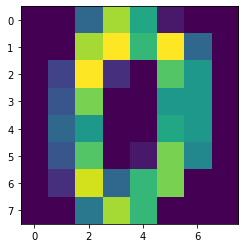

In [57]:
plt.imshow(im)

## 1.4 Visual recognition of correlations

In this part you shall plot different attributes against each other in a scatterplot to find out if the selected attributes are correlated.

The [scatter()](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html) function from matplotlib might be worthwhile to look into.

Don't forget the title and axes labeling for your plots!


### Task 1.4.1 Nitric oxid concentration and industrial density

We assume a positive correlation between the proportion of non-retail business acres per town and the amount of nitric oxid in the air as a result of higher emissions in industrial areas.
Plot the asscociated attributes (INDUS and NOX) against each other and analyse the plot to find out if this is true.

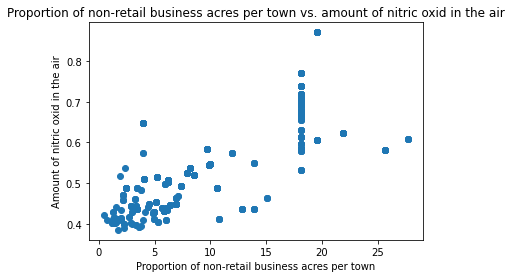

'\nWe can see a positive correlation between both datasets because on average, y-values are higher, the bigger their corresponding x-values are.\n'

In [60]:
indus_index = np.where(boston['feature_names'] == 'INDUS')[0][0]
indus = boston['data'][:,indus_index]

nox_index = np.where(boston['feature_names'] == 'NOX')[0][0]
nox = boston['data'][:,nox_index]

plot = plt.scatter(indus, nox)
plt.title("Proportion of non-retail business acres per town vs. amount of nitric oxid in the air")
plt.xlabel("Proportion of non-retail business acres per town")
plt.ylabel("Amount of nitric oxid in the air")
plt.show()

# is the assumption true?: your answer here.
"""
The assumption is true.
We can see a positive correlation between both datasets because on average, y-values are higher, the bigger their corresponding x-values are.
"""

### Task 1.4.2 House age and number of rooms

We assume a negative correlation between the number of rooms and the age of the house as a result of the trend towards more open interior design choices and larger rooms in modern housing.
Plot the asscociated attributes (RM and AGE) against each other and analyse the plot to find out if this assumption is true.

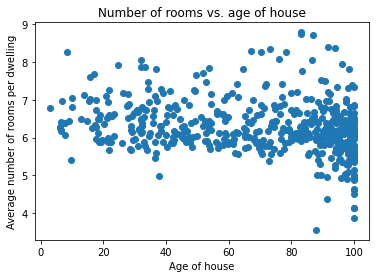

'\nThe assumption is false. A negative correlation cannot be seen. The data seems to be distributed approximately uniformly.\n\n'

In [65]:
rm_index = np.where(boston['feature_names'] == 'RM')[0][0]
rm = boston['data'][:,rm_index]

age_index = np.where(boston['feature_names'] == 'AGE')[0][0]
age = boston['data'][:,age_index]

plot = plt.scatter(age, rm)
plt.title("Age of house vs. number of rooms")
plt.ylabel("Average number of rooms per dwelling")
plt.xlabel("Age of house")
plt.show()

# is the assumption true?: your answer here.
"""
The assumption is false. A negative correlation cannot be seen. The data seems to be distributed approximately uniformly.

"""

### Task 1.4.3 Social status and price
We assume a negative correlation between the amount of people with lower social status in a neighbourhood and the house prices.
Plot the associated attributes (LSTAT and MDEV) against each other and analyse the plot to find out if this assumption is true.

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


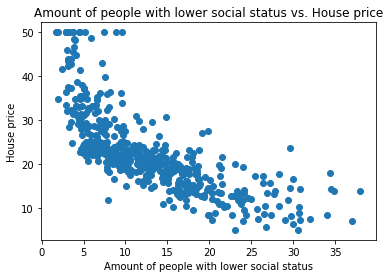

'\nThe assumption is true. We can clearly see that, on average, the higher the amount of people with lower social status, the lower their corresponding house prices get.\n\n'

In [78]:
print(boston['feature_names'])

lstat_index = np.where(boston['feature_names'] == 'LSTAT')[0][0]
lstat = boston['data'][:,lstat_index]

# mdev_index = np.where(boston['feature_names'] == 'MEDV')[0][0]
mdev = boston['target']

plot = plt.scatter(lstat, mdev)
plt.title("Amount of people with lower social status vs. House price")
plt.xlabel("Amount of people with lower social status")
plt.ylabel("House price")
plt.show()

# is the assumption true?: your answer here.
"""
The assumption is true. We can clearly see that, on average, the higher the amount of people with lower social status, the lower their corresponding house prices get.

"""